In [4]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import norm
from scipy import stats 
from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [5]:
customer_df = pd.read_csv('./we_fn_use_c_marketing_customer_value_analysis.csv') 
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
#reemplazo mayusculas y espacios en los nombres de las columnas. 
customer_df.columns=customer_df.columns.str.upper().str.replace(' ','_')

In [7]:
#Separo las variables en numericas y categoricas 
numerical_df = customer_df.select_dtypes(np.number)
categorical_df = customer_df.select_dtypes(object)

In [8]:
numerical_df

,CUSTOMER_LIFETIME_VALUE,INCOME,MONTHLY_PREMIUM_AUTO,MONTHS_SINCE_LAST_CLAIM,MONTHS_SINCE_POLICY_INCEPTION,NUMBER_OF_OPEN_COMPLAINTS,NUMBER_OF_POLICIES,TOTAL_CLAIM_AMOUNT
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [9]:
categorical_df

,CUSTOMER,STATE,RESPONSE,COVERAGE,EDUCATION,EFFECTIVE_TO_DATE,EMPLOYMENTSTATUS,GENDER,LOCATION_CODE,MARITAL_STATUS,POLICY_TYPE,POLICY,RENEW_OFFER_TYPE,SALES_CHANNEL,VEHICLE_CLASS,VEHICLE_SIZE
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [10]:
# se puede reemplazar el nombre de la columna para ver los valores de cada columna. 
categorical_df.VEHICLE_SIZE.value_counts()

Medsize    6424
Small      1764
Large       946
Name: VEHICLE_SIZE, dtype: int64

#grafico para las variables categoricas 
for column in categorical_df.columns:
    plt.figure(figsize=(8, 6))
    plt.bar(categorical_df[column], numerical_df['TOTAL_CLAIM_AMOUNT'])
    plt.xlabel(column)
    plt.ylabel('TOTAL_CLAIM_AMOUNT')
    plt.title(f'{column} vs TOTAL_CLAIM_AMOUNT')
    plt.show()

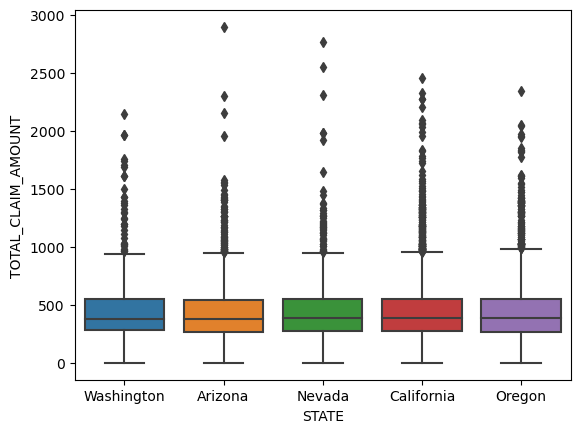

In [11]:
sns.boxplot(x="STATE", y="TOTAL_CLAIM_AMOUNT", data=customer_df)
plt.show()

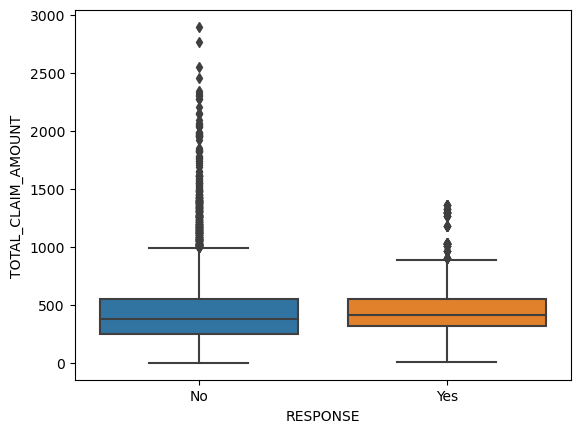

In [12]:
sns.boxplot(x="RESPONSE", y="TOTAL_CLAIM_AMOUNT", data=customer_df)
plt.show()

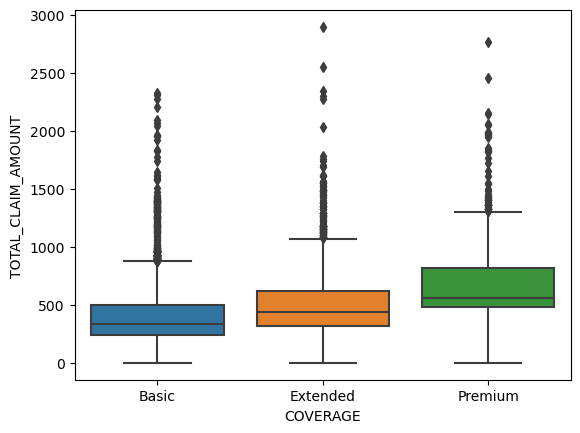

In [13]:
sns.boxplot(x="COVERAGE", y="TOTAL_CLAIM_AMOUNT", data=customer_df)
plt.show()

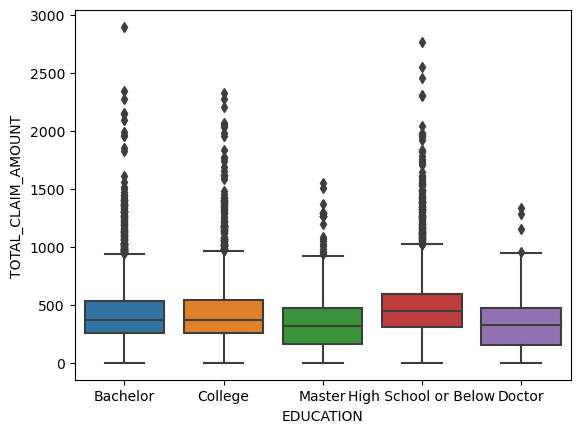

In [14]:
sns.boxplot(x="EDUCATION", y="TOTAL_CLAIM_AMOUNT", data=customer_df)
plt.show()

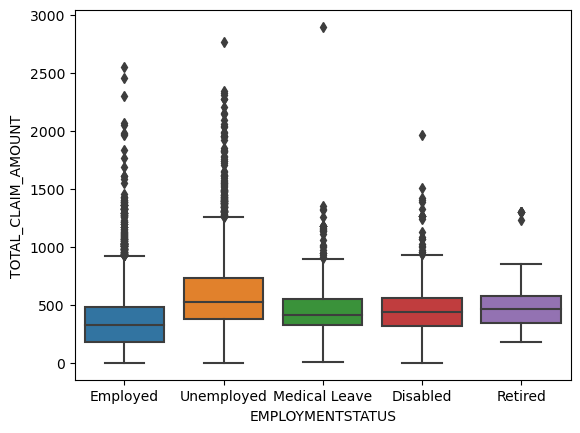

In [15]:
sns.boxplot(x="EMPLOYMENTSTATUS", y="TOTAL_CLAIM_AMOUNT", data=customer_df)
plt.show()

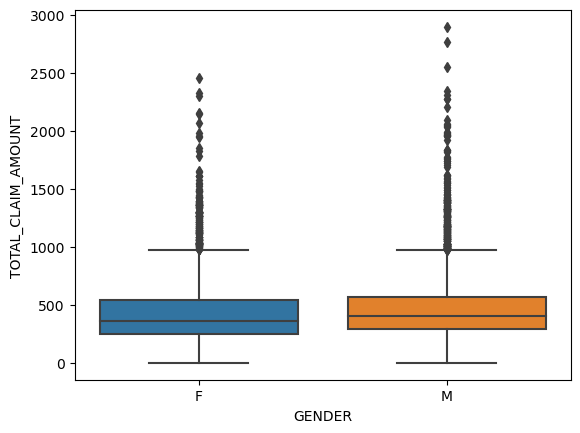

In [16]:
sns.boxplot(x="GENDER", y="TOTAL_CLAIM_AMOUNT", data=customer_df)
plt.show()

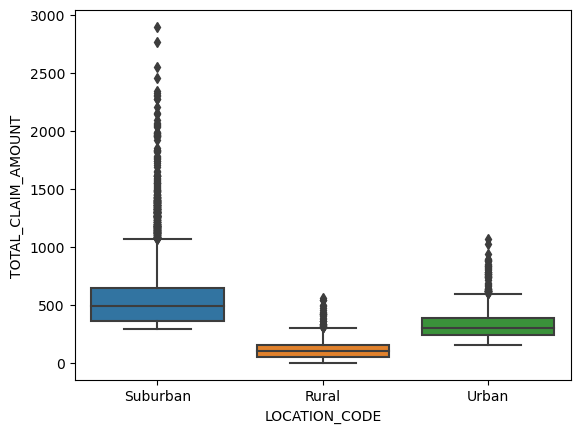

In [17]:
sns.boxplot(x="LOCATION_CODE", y="TOTAL_CLAIM_AMOUNT", data=customer_df)
plt.show()

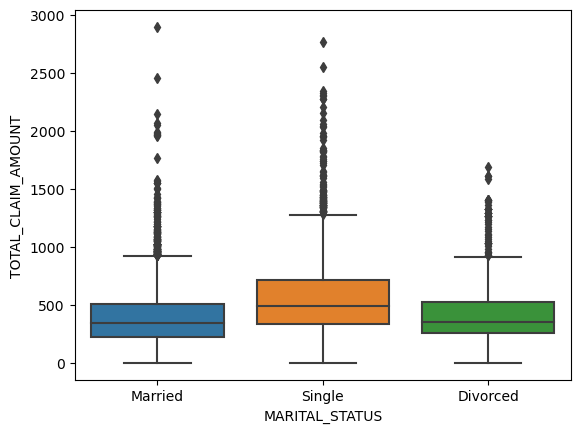

In [18]:
sns.boxplot(x="MARITAL_STATUS", y="TOTAL_CLAIM_AMOUNT", data=customer_df)
plt.show()

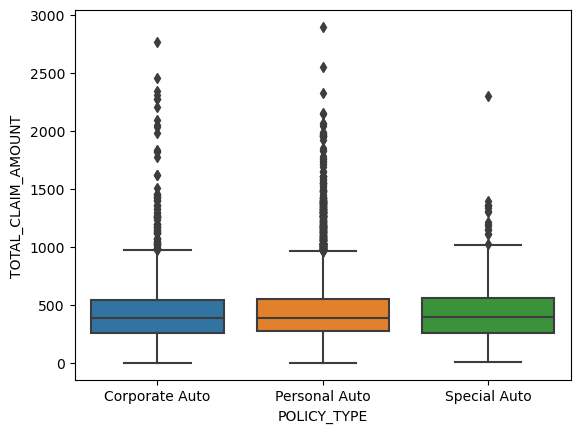

In [19]:
sns.boxplot(x="POLICY_TYPE", y="TOTAL_CLAIM_AMOUNT", data=customer_df)
plt.show()

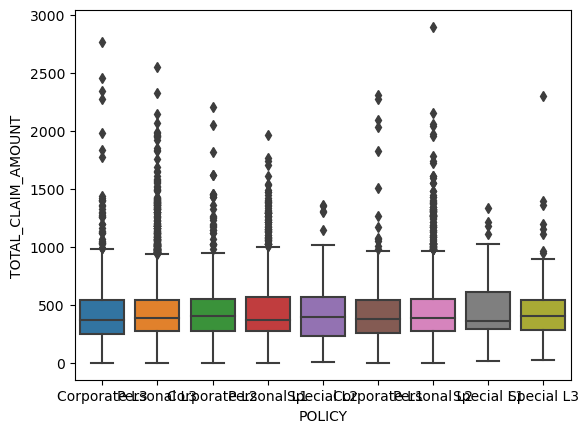

In [20]:
sns.boxplot(x="POLICY", y="TOTAL_CLAIM_AMOUNT", data=customer_df)
plt.show()

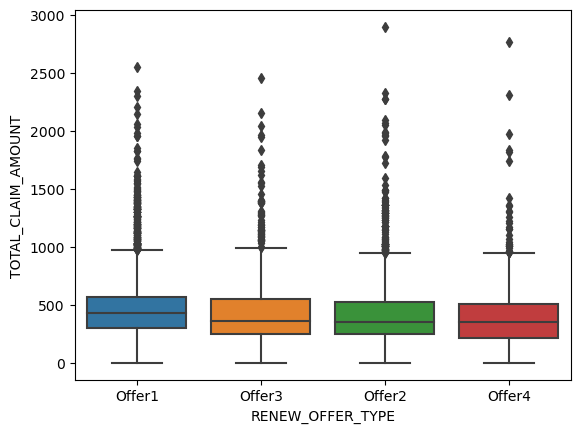

In [21]:
sns.boxplot(x="RENEW_OFFER_TYPE", y="TOTAL_CLAIM_AMOUNT", data=customer_df)
plt.show()

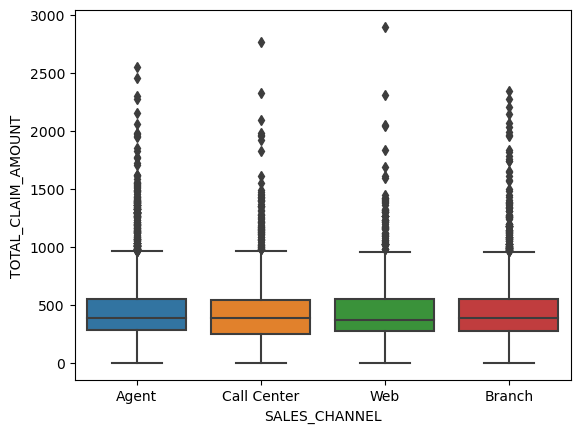

In [22]:
sns.boxplot(x="SALES_CHANNEL", y="TOTAL_CLAIM_AMOUNT", data=customer_df)
plt.show()

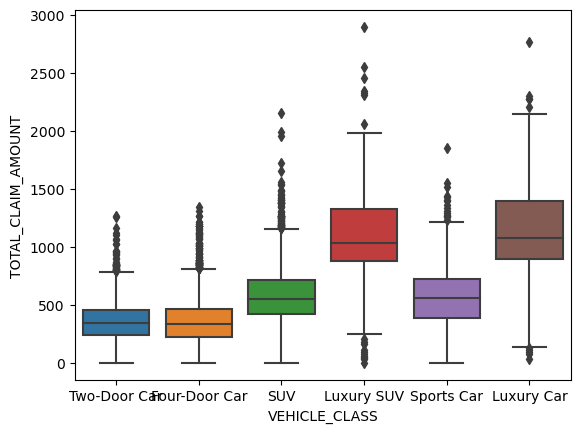

In [23]:
sns.boxplot(x="VEHICLE_CLASS", y="TOTAL_CLAIM_AMOUNT", data=customer_df)
plt.show()

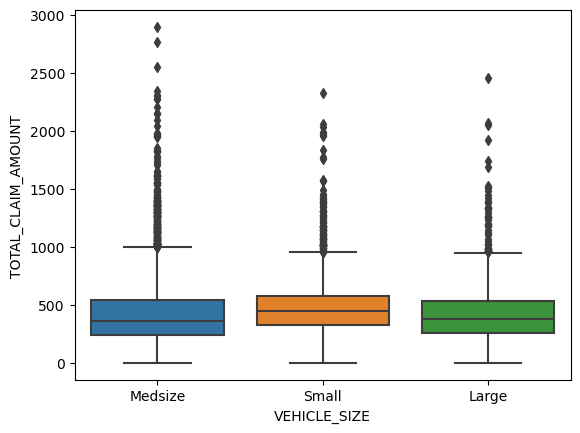

In [24]:
sns.boxplot(x="VEHICLE_SIZE", y="TOTAL_CLAIM_AMOUNT", data=customer_df)
plt.show()

In [25]:
for column in categorical_df.columns:
    print(f"Columna: {column}")
    print(categorical_df[column].value_counts())
    print()

Columna: CUSTOMER
BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: CUSTOMER, Length: 9134, dtype: int64

Columna: STATE
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: STATE, dtype: int64

Columna: RESPONSE
No     7826
Yes    1308
Name: RESPONSE, dtype: int64

Columna: COVERAGE
Basic       5568
Extended    2742
Premium      824
Name: COVERAGE, dtype: int64

Columna: EDUCATION
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: EDUCATION, dtype: int64

Columna: EFFECTIVE_TO_DATE
1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/31/11    178
1/3/11     178
1/20/11    173
2/26/11    169
1/28/11    169
2/19/11    168
1/5/11     167
2/27/11    167
1/11/11    166
2/4/11     164
2/10/11    161
2/28/11   

# LAB Feature extraction 
Las variables categoricas están graficadas arriba (punto 1,2 y 3)

In [26]:
 categorical_df['EFFECTIVE_TO_DATE'] 

0       2/24/11
1       1/31/11
2       2/19/11
3       1/20/11
4        2/3/11
         ...   
9129    2/10/11
9130    2/12/11
9131     2/6/11
9132     2/3/11
9133    2/14/11
Name: EFFECTIVE_TO_DATE, Length: 9134, dtype: object

In [27]:
# comprobando los datos, veo que effective_to_date, se puede agrupar por meses y solo se generarian 2 categorias. 
categorical_df['Month_Year'] = categorical_df['EFFECTIVE_TO_DATE'].apply(lambda x: 'January 2011' if x.startswith('1') else 'February 2011')

In [28]:
categorical_df['Month_Year']

0       February 2011
1        January 2011
2       February 2011
3        January 2011
4       February 2011
            ...      
9129    February 2011
9130    February 2011
9131    February 2011
9132    February 2011
9133    February 2011
Name: Month_Year, Length: 9134, dtype: object

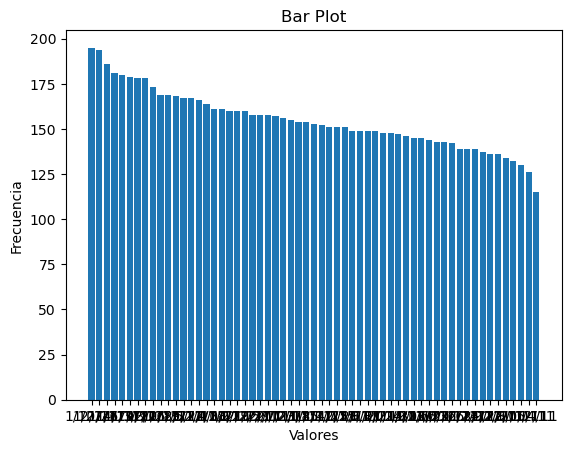

In [29]:
#grafico de las variables sin unificar 
counts = categorical_df['EFFECTIVE_TO_DATE'].value_counts()
plt.bar(counts.index, counts.values)
plt.title('Bar Plot')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

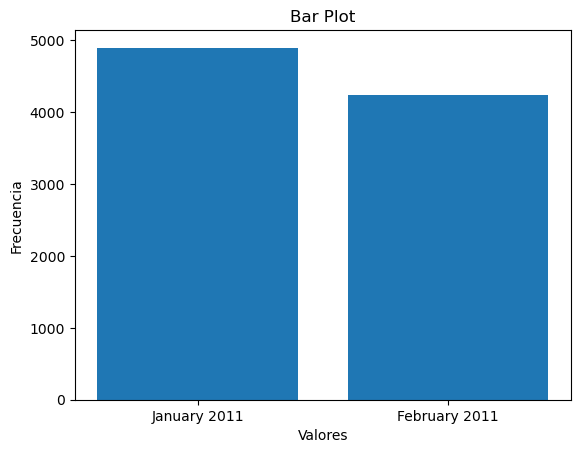

In [30]:
#graficos, variables unificadas. 
counts = categorical_df['Month_Year'].value_counts()
plt.bar(counts.index, counts.values)
plt.title('Bar Plot')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

## Lab | Data cleaning and wrangling

In [31]:
#creo una copia de seguridad. 
customer_df2=customer_df.copy()

In [32]:
def remove_outliers_zscore(customer_df2, columns, threshold=3):
    """
    Remove outliers from DataFrame using z-score method.
    
    Parameters:
    - df: DataFrame
    - columns: List of column names to remove outliers from
    - threshold: Z-score threshold (default is 3)
    
    Returns:
    - DataFrame with outliers removed
    """
    z_scores = np.abs((df[columns] - df[columns].mean()) / df[columns].std())
    df_cleaned = df[(z_scores < threshold).all(axis=1)]
    return df_cleaned

In [33]:
customer_df2

,CUSTOMER,STATE,CUSTOMER_LIFETIME_VALUE,RESPONSE,COVERAGE,EDUCATION,EFFECTIVE_TO_DATE,EMPLOYMENTSTATUS,GENDER,INCOME,LOCATION_CODE,MARITAL_STATUS,MONTHLY_PREMIUM_AUTO,MONTHS_SINCE_LAST_CLAIM,MONTHS_SINCE_POLICY_INCEPTION,NUMBER_OF_OPEN_COMPLAINTS,NUMBER_OF_POLICIES,POLICY_TYPE,POLICY,RENEW_OFFER_TYPE,SALES_CHANNEL,TOTAL_CLAIM_AMOUNT,VEHICLE_CLASS,VEHICLE_SIZE
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [34]:
# Función para eliminar outliers de numericos. 
""" 
def remove_outliers(df):
    new_df = df.copy()  # Crear una copia del dataframe original
    
    # Convertir todas las columnas numéricas a tipo de datos numérico explícito
    numeric_columns = df.select_dtypes(include=np.number).columns
    new_df[numeric_columns] = new_df[numeric_columns].apply(pd.to_numeric, errors='coerce')
    
    for column in new_df.columns:
        # Calcular los límites del rango intercuartil (IQR)
        iqr = np.percentile(new_df[column], 75) - np.percentile(new_df[column], 25)
        upper_limit = np.percentile(new_df[column], 75) + 1.5 * iqr
        
        # Filtrar los valores que están por encima del límite superior
        new_df = new_df[new_df[column] <= upper_limit]
    
    return new_df 
    
    cleaned_df = remove_outliers(df)"""

" \ndef remove_outliers(df):\n    new_df = df.copy()  # Crear una copia del dataframe original\n    \n    # Convertir todas las columnas numéricas a tipo de datos numérico explícito\n    numeric_columns = df.select_dtypes(include=np.number).columns\n    new_df[numeric_columns] = new_df[numeric_columns].apply(pd.to_numeric, errors='coerce')\n    \n    for column in new_df.columns:\n        # Calcular los límites del rango intercuartil (IQR)\n        iqr = np.percentile(new_df[column], 75) - np.percentile(new_df[column], 25)\n        upper_limit = np.percentile(new_df[column], 75) + 1.5 * iqr\n        \n        # Filtrar los valores que están por encima del límite superior\n        new_df = new_df[new_df[column] <= upper_limit]\n    \n    return new_df \n    \n    cleaned_df = remove_outliers(df)"

In [35]:
# Función para remover outliers de todo el DF, tanto de variables numericas como de variables categoricas. 
def remove_outliers(df, threshold=3):
    # Compute the z-scores for each column
    z_scores = np.abs((df - df.mean()) / df.std())

    # Create a boolean mask to identify outliers
    mask = z_scores > threshold

    # Remove rows containing outliers
    cleaned_df = df[~mask.any(axis=1)]

    return cleaned_df

In [36]:
cleaned_df = remove_outliers(customer_df2)
cleaned_df

,CUSTOMER,STATE,CUSTOMER_LIFETIME_VALUE,RESPONSE,COVERAGE,EDUCATION,EFFECTIVE_TO_DATE,EMPLOYMENTSTATUS,GENDER,INCOME,LOCATION_CODE,MARITAL_STATUS,MONTHLY_PREMIUM_AUTO,MONTHS_SINCE_LAST_CLAIM,MONTHS_SINCE_POLICY_INCEPTION,NUMBER_OF_OPEN_COMPLAINTS,NUMBER_OF_POLICIES,POLICY_TYPE,POLICY,RENEW_OFFER_TYPE,SALES_CHANNEL,TOTAL_CLAIM_AMOUNT,VEHICLE_CLASS,VEHICLE_SIZE
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [37]:
#separo laa variables numericas de las categoricas. 
numerical_cleaned_df = cleaned_df.select_dtypes(np.number)
categorical_cleaned_df = cleaned_df.select_dtypes(object)


### Tratamiento de variables numericas.

In [38]:
numerical_cleaned_df

,CUSTOMER_LIFETIME_VALUE,INCOME,MONTHLY_PREMIUM_AUTO,MONTHS_SINCE_LAST_CLAIM,MONTHS_SINCE_POLICY_INCEPTION,NUMBER_OF_OPEN_COMPLAINTS,NUMBER_OF_POLICIES,TOTAL_CLAIM_AMOUNT
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [42]:
#normalización de variables. 
Y=numerical_cleaned_df['TOTAL_CLAIM_AMOUNT']
X=numerical_cleaned_df.drop('TOTAL_CLAIM_AMOUNT', axis=1)
transformer=StandardScaler().fit(numerical_cleaned_df)
x_normalized=transformer.transform(numerical_cleaned_df)
df_norm=pd.DataFrame(x_normalized)
df_norm

,0,1,2,3,4,5,6,7
0,-0.902330,0.604143,-0.759251,1.683302,-1.535241,-0.421328,-0.824388,-0.077985
1,-0.034509,-1.244638,0.199794,-0.204683,-0.208285,-0.421328,2.076038,3.127280
2,1.181567,0.357514,0.736859,0.292155,-0.351739,-0.421328,-0.410042,0.701857
3,0.102647,-1.244638,0.660135,0.292155,0.616580,-0.421328,1.661691,0.544778
4,-0.892003,0.195515,-0.605804,-0.304051,-0.136557,-0.421328,-0.824388,-1.136944
...,...,...,...,...,...,...,...,...
8465,3.346697,1.118854,-0.605804,0.292155,1.477309,-0.421328,-0.410042,-0.878928
8466,-0.833787,-0.534877,-0.375633,-0.105316,-0.710376,-0.421328,-0.824388,-0.102073
8467,0.209277,-1.244638,-0.145462,-0.602154,-0.387603,3.885167,-0.410042,1.664796
8468,0.077654,-0.523806,0.276517,1.882037,-1.606969,-0.421328,0.004305,1.237293


In [43]:
#cambio el nombre de las columnas del DF normalizado.
col_num=numerical_cleaned_df.columns
df_norm.columns=col_num
df_norm

,CUSTOMER_LIFETIME_VALUE,INCOME,MONTHLY_PREMIUM_AUTO,MONTHS_SINCE_LAST_CLAIM,MONTHS_SINCE_POLICY_INCEPTION,NUMBER_OF_OPEN_COMPLAINTS,NUMBER_OF_POLICIES,TOTAL_CLAIM_AMOUNT
0,-0.902330,0.604143,-0.759251,1.683302,-1.535241,-0.421328,-0.824388,-0.077985
1,-0.034509,-1.244638,0.199794,-0.204683,-0.208285,-0.421328,2.076038,3.127280
2,1.181567,0.357514,0.736859,0.292155,-0.351739,-0.421328,-0.410042,0.701857
3,0.102647,-1.244638,0.660135,0.292155,0.616580,-0.421328,1.661691,0.544778
4,-0.892003,0.195515,-0.605804,-0.304051,-0.136557,-0.421328,-0.824388,-1.136944
...,...,...,...,...,...,...,...,...
8465,3.346697,1.118854,-0.605804,0.292155,1.477309,-0.421328,-0.410042,-0.878928
8466,-0.833787,-0.534877,-0.375633,-0.105316,-0.710376,-0.421328,-0.824388,-0.102073
8467,0.209277,-1.244638,-0.145462,-0.602154,-0.387603,3.885167,-0.410042,1.664796
8468,0.077654,-0.523806,0.276517,1.882037,-1.606969,-0.421328,0.004305,1.237293


### Tratamiento de variables categoricas.

In [44]:
categorical_cleaned_df

,CUSTOMER,STATE,RESPONSE,COVERAGE,EDUCATION,EFFECTIVE_TO_DATE,EMPLOYMENTSTATUS,GENDER,LOCATION_CODE,MARITAL_STATUS,POLICY_TYPE,POLICY,RENEW_OFFER_TYPE,SALES_CHANNEL,VEHICLE_CLASS,VEHICLE_SIZE
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [46]:
#trabajo primero con la variable fecha
categorical_cleaned_df['EFFECTIVE_TO_DATE'] = pd.to_datetime(categorical_cleaned_df['EFFECTIVE_TO_DATE'])

In [47]:
categorical_cleaned_df['Day of Week'] = categorical_cleaned_df['EFFECTIVE_TO_DATE'].dt.weekday

In [48]:
categorical_cleaned_df['Day of Month'] = categorical_cleaned_df['EFFECTIVE_TO_DATE'].dt.day

In [49]:
categorical_cleaned_df['Month'] = categorical_cleaned_df['EFFECTIVE_TO_DATE'].dt.month

In [ ]:
categorical_cleaned_df

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Day of Week,Day of Month,Month
0,BU79786,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,3,24,2
1,QZ44356,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,0,31,1
2,AI49188,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,5,19,2
3,WW63253,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,3,20,1
4,HB64268,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2011-02-10,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize,3,10,2
9130,PK87824,California,Yes,Extended,College,2011-02-12,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize,5,12,2
9131,TD14365,California,No,Extended,Bachelor,2011-02-06,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize,6,6,2
9132,UP19263,California,No,Extended,College,2011-02-03,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large,3,3,2


In [55]:
# voy a realizar dummies por lo que voy a borrar customer y effective to date, por que va a alterar el tamaño de mi DF
categorical_cleaned_df2=categorical_cleaned_df.copy()
categorical_cleaned_df2

,CUSTOMER,STATE,RESPONSE,COVERAGE,EDUCATION,EFFECTIVE_TO_DATE,EMPLOYMENTSTATUS,GENDER,LOCATION_CODE,MARITAL_STATUS,POLICY_TYPE,POLICY,RENEW_OFFER_TYPE,SALES_CHANNEL,VEHICLE_CLASS,VEHICLE_SIZE,Day of Week,Day of Month,Month
0,BU79786,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,3,24,2
1,QZ44356,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,0,31,1
2,AI49188,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,5,19,2
3,WW63253,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,3,20,1
4,HB64268,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2011-02-10,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize,3,10,2
9130,PK87824,California,Yes,Extended,College,2011-02-12,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize,5,12,2
9131,TD14365,California,No,Extended,Bachelor,2011-02-06,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize,6,6,2
9132,UP19263,California,No,Extended,College,2011-02-03,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large,3,3,2


In [56]:
categorical_cleaned_df2=categorical_cleaned_df2.drop(['EFFECTIVE_TO_DATE', 'CUSTOMER'],axis=1)
categorical_cleaned_df2

,STATE,RESPONSE,COVERAGE,EDUCATION,EMPLOYMENTSTATUS,GENDER,LOCATION_CODE,MARITAL_STATUS,POLICY_TYPE,POLICY,RENEW_OFFER_TYPE,SALES_CHANNEL,VEHICLE_CLASS,VEHICLE_SIZE,Day of Week,Day of Month,Month
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,3,24,2
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,0,31,1
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,5,19,2
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,3,20,1
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize,3,10,2
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize,5,12,2
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize,6,6,2
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large,3,3,2


In [57]:
#obtengo dummies
one_hot_encoded = pd.get_dummies(categorical_cleaned_df2[["STATE", "MARITAL_STATUS", "POLICY_TYPE", "POLICY", "RENEW_OFFER_TYPE", "SALES_CHANNEL", "VEHICLE_CLASS"]])
one_hot_encoded

,STATE_Arizona,STATE_California,STATE_Nevada,STATE_Oregon,STATE_Washington,MARITAL_STATUS_Divorced,MARITAL_STATUS_Married,MARITAL_STATUS_Single,POLICY_TYPE_Corporate Auto,POLICY_TYPE_Personal Auto,POLICY_TYPE_Special Auto,POLICY_Corporate L1,POLICY_Corporate L2,POLICY_Corporate L3,POLICY_Personal L1,POLICY_Personal L2,POLICY_Personal L3,POLICY_Special L1,POLICY_Special L2,POLICY_Special L3,RENEW_OFFER_TYPE_Offer1,RENEW_OFFER_TYPE_Offer2,RENEW_OFFER_TYPE_Offer3,RENEW_OFFER_TYPE_Offer4,SALES_CHANNEL_Agent,SALES_CHANNEL_Branch,SALES_CHANNEL_Call Center,SALES_CHANNEL_Web,VEHICLE_CLASS_Four-Door Car,VEHICLE_CLASS_Luxury Car,VEHICLE_CLASS_Luxury SUV,VEHICLE_CLASS_SUV,VEHICLE_CLASS_Sports Car,VEHICLE_CLASS_Two-Door Car
0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
9130,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
9131,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
9132,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0


In [58]:
categorical_cleaned_df2["COVERAGE"].value_counts()

Basic       5272
Extended    2492
Premium      706
Name: COVERAGE, dtype: int64

In [59]:
#utilizo value counts para extraer los valores de cada una de las columnas. 

coverage_mapping = {"Basic": 0, "Extended": 1, "Premium": 2}
categorical_cleaned_df2["COVERAGE"] = categorical_cleaned_df2["COVERAGE"].map(coverage_mapping)

# Transformación ordinal para "EMPLOYMENTSTATUS"
EMPLOYMENTSTATUS_mapping = categorical_cleaned_df2["EMPLOYMENTSTATUS"].value_counts().reset_index().reset_index().set_index("index")["level_0"].to_dict()
categorical_cleaned_df2["EMPLOYMENTSTATUS"] = categorical_cleaned_df2["EMPLOYMENTSTATUS"].map(EMPLOYMENTSTATUS_mapping)

# Transformación ordinal para "LOCATION_CODE"
location_mapping = categorical_cleaned_df2["LOCATION_CODE"].value_counts().reset_index().reset_index().set_index("index")["level_0"].to_dict()
categorical_cleaned_df2["LOCATION_CODE"] = categorical_cleaned_df2["LOCATION_CODE"].map(location_mapping)

# Transformación ordinal para "VEHICLE_SIZE"
vehicle_mapping = categorical_cleaned_df2["VEHICLE_SIZE"].value_counts().reset_index().reset_index().set_index("index")["level_0"].to_dict()
categorical_cleaned_df2["VEHICLE_SIZE"] = categorical_cleaned_df2["VEHICLE_SIZE"].map(vehicle_mapping)

In [62]:
df_ordinal=categorical_cleaned_df2[["COVERAGE","EMPLOYMENTSTATUS", "LOCATION_CODE", "VEHICLE_SIZE"]]
df_ordinal

,COVERAGE,EMPLOYMENTSTATUS,LOCATION_CODE,VEHICLE_SIZE
0,0,0,0,0
1,1,1,0,0
2,2,0,0,0
3,0,1,0,0
4,0,0,1,0
...,...,...,...,...
9129,0,0,2,0
9130,1,0,0,0
9131,1,1,0,0
9132,1,0,0,2


In [63]:
#Df categorico trabajado. 
df_categoric_treated = pd.concat([one_hot_encoded, df_ordinal], axis=1)
df_categoric_treated

,STATE_Arizona,STATE_California,STATE_Nevada,STATE_Oregon,STATE_Washington,MARITAL_STATUS_Divorced,MARITAL_STATUS_Married,MARITAL_STATUS_Single,POLICY_TYPE_Corporate Auto,POLICY_TYPE_Personal Auto,POLICY_TYPE_Special Auto,POLICY_Corporate L1,POLICY_Corporate L2,POLICY_Corporate L3,POLICY_Personal L1,POLICY_Personal L2,POLICY_Personal L3,POLICY_Special L1,POLICY_Special L2,POLICY_Special L3,RENEW_OFFER_TYPE_Offer1,RENEW_OFFER_TYPE_Offer2,RENEW_OFFER_TYPE_Offer3,RENEW_OFFER_TYPE_Offer4,SALES_CHANNEL_Agent,SALES_CHANNEL_Branch,SALES_CHANNEL_Call Center,SALES_CHANNEL_Web,VEHICLE_CLASS_Four-Door Car,VEHICLE_CLASS_Luxury Car,VEHICLE_CLASS_Luxury SUV,VEHICLE_CLASS_SUV,VEHICLE_CLASS_Sports Car,VEHICLE_CLASS_Two-Door Car,COVERAGE,EMPLOYMENTSTATUS,LOCATION_CODE,VEHICLE_SIZE
0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0
2,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,2,0,0,0
3,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
4,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,2,0
9130,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
9131,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0
9132,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,2


In [64]:
df_categoric_treated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8470 entries, 0 to 9133
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   STATE_Arizona                8470 non-null   uint8
 1   STATE_California             8470 non-null   uint8
 2   STATE_Nevada                 8470 non-null   uint8
 3   STATE_Oregon                 8470 non-null   uint8
 4   STATE_Washington             8470 non-null   uint8
 5   MARITAL_STATUS_Divorced      8470 non-null   uint8
 6   MARITAL_STATUS_Married       8470 non-null   uint8
 7   MARITAL_STATUS_Single        8470 non-null   uint8
 8   POLICY_TYPE_Corporate Auto   8470 non-null   uint8
 9   POLICY_TYPE_Personal Auto    8470 non-null   uint8
 10  POLICY_TYPE_Special Auto     8470 non-null   uint8
 11  POLICY_Corporate L1          8470 non-null   uint8
 12  POLICY_Corporate L2          8470 non-null   uint8
 13  POLICY_Corporate L3          8470 non-null   uin

In [65]:
# genero un nuevo DF con las fechas.(se podría normalizar)
data_date = categorical_cleaned_df2[["Day of Week","Day of Month","Month"]]
data_date

,Day of Week,Day of Month,Month
0,3,24,2
1,0,31,1
2,5,19,2
3,3,20,1
4,3,3,2
...,...,...,...
9129,3,10,2
9130,5,12,2
9131,6,6,2
9132,3,3,2


In [66]:
# Concateno los 3 dataframes, numerico normalizado, categorico tratado y las fechas en formato dia de la semana dia del mes y mes. 
#reseteo los indices de los DF ya que cuando los concatene sin resetear, se me generaron mas rows con valores nulos. 
df_norm.reset_index(drop=True, inplace=True)

data_date.reset_index(drop=True, inplace=True)

df_categoric_treated.reset_index(drop=True, inplace=True)

In [67]:
DF_final= pd.concat([df_norm, data_date, df_categoric_treated], axis=1)
DF_final

,CUSTOMER_LIFETIME_VALUE,INCOME,MONTHLY_PREMIUM_AUTO,MONTHS_SINCE_LAST_CLAIM,MONTHS_SINCE_POLICY_INCEPTION,NUMBER_OF_OPEN_COMPLAINTS,NUMBER_OF_POLICIES,TOTAL_CLAIM_AMOUNT,Day of Week,Day of Month,Month,STATE_Arizona,STATE_California,STATE_Nevada,STATE_Oregon,STATE_Washington,MARITAL_STATUS_Divorced,MARITAL_STATUS_Married,MARITAL_STATUS_Single,POLICY_TYPE_Corporate Auto,POLICY_TYPE_Personal Auto,POLICY_TYPE_Special Auto,POLICY_Corporate L1,POLICY_Corporate L2,POLICY_Corporate L3,POLICY_Personal L1,POLICY_Personal L2,POLICY_Personal L3,POLICY_Special L1,POLICY_Special L2,POLICY_Special L3,RENEW_OFFER_TYPE_Offer1,RENEW_OFFER_TYPE_Offer2,RENEW_OFFER_TYPE_Offer3,RENEW_OFFER_TYPE_Offer4,SALES_CHANNEL_Agent,SALES_CHANNEL_Branch,SALES_CHANNEL_Call Center,SALES_CHANNEL_Web,VEHICLE_CLASS_Four-Door Car,VEHICLE_CLASS_Luxury Car,VEHICLE_CLASS_Luxury SUV,VEHICLE_CLASS_SUV,VEHICLE_CLASS_Sports Car,VEHICLE_CLASS_Two-Door Car,COVERAGE,EMPLOYMENTSTATUS,LOCATION_CODE,VEHICLE_SIZE
0,-0.902330,0.604143,-0.759251,1.683302,-1.535241,-0.421328,-0.824388,-0.077985,3,24,2,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,-0.034509,-1.244638,0.199794,-0.204683,-0.208285,-0.421328,2.076038,3.127280,0,31,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0
2,1.181567,0.357514,0.736859,0.292155,-0.351739,-0.421328,-0.410042,0.701857,5,19,2,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,2,0,0,0
3,0.102647,-1.244638,0.660135,0.292155,0.616580,-0.421328,1.661691,0.544778,3,20,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
4,-0.892003,0.195515,-0.605804,-0.304051,-0.136557,-0.421328,-0.824388,-1.136944,3,3,2,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8465,3.346697,1.118854,-0.605804,0.292155,1.477309,-0.421328,-0.410042,-0.878928,3,10,2,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,2,0
8466,-0.833787,-0.534877,-0.375633,-0.105316,-0.710376,-0.421328,-0.824388,-0.102073,5,12,2,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
8467,0.209277,-1.244638,-0.145462,-0.602154,-0.387603,3.885167,-0.410042,1.664796,6,6,2,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0
8468,0.077654,-0.523806,0.276517,1.882037,-1.606969,-0.421328,0.004305,1.237293,3,3,2,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,2


In [68]:
DF_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8470 entries, 0 to 8469
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CUSTOMER_LIFETIME_VALUE        8470 non-null   float64
 1   INCOME                         8470 non-null   float64
 2   MONTHLY_PREMIUM_AUTO           8470 non-null   float64
 3   MONTHS_SINCE_LAST_CLAIM        8470 non-null   float64
 4   MONTHS_SINCE_POLICY_INCEPTION  8470 non-null   float64
 5   NUMBER_OF_OPEN_COMPLAINTS      8470 non-null   float64
 6   NUMBER_OF_POLICIES             8470 non-null   float64
 7   TOTAL_CLAIM_AMOUNT             8470 non-null   float64
 8   Day of Week                    8470 non-null   int64  
 9   Day of Month                   8470 non-null   int64  
 10  Month                          8470 non-null   int64  
 11  STATE_Arizona                  8470 non-null   uint8  
 12  STATE_California               8470 non-null   u

In [69]:
numeric_columns = DF_final.select_dtypes(include="number").columns
if len(numeric_columns) == len(DF_final.columns):
    print("Todas las columnas son numéricas")
else:
    print("Algunas columnas no son numéricas")

Todas las columnas son numéricas


### Lab | Comparing regression models

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [70]:
Y=DF_final["TOTAL_CLAIM_AMOUNT"]
X=DF_final.drop(["TOTAL_CLAIM_AMOUNT"], axis=1)


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=100)

## NKK 

In [82]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=6)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=6)

In [83]:
predictions = model.predict(X_test)

In [84]:
score = model.score(X_test, y_test)
score

0.4030602204075796

## Regresión Lineal 

In [76]:
from sklearn import linear_model

In [77]:
lm=linear_model.LinearRegression()
model_lm=lm.fit(X_train, y_train)
predictions=lm.predict(X_test)
r2_score(y_test, predictions)

0.5352851283145734

### Defino función para realizar el split test y aplico los dos modelos.

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

# Assuming your data is stored in a DataFrame named 'data'
x = DF_final.drop('TOTAL_CLAIM_AMOUNT', axis=1)
y = DF_final['TOTAL_CLAIM_AMOUNT']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [91]:
# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

# Evaluate the model on the test set
linear_r2_score = linear_model.score(x_test, y_test)
print("Linear Regression R2 Score:", linear_r2_score)

Linear Regression R2 Score: 0.5357435837744027


In [92]:
#la función para el train test split. 
def train_and_test_models(models, X_train, X_test, y_train, y_test):
    results = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        r2_score = model.score(X_test, y_test)
        results[model_name] = r2_score
    return results

In [94]:
models = {
    'Linear Regression': LinearRegression(),
    'KNeighbors Regressor': KNeighborsRegressor()
}

results = train_and_test_models(models, x_train, x_test, y_train, y_test)

# Print the results
for model_name, r2_score in results.items():
    print(f"{model_name} R2 Score: {r2_score}")

Linear Regression R2 Score: 0.5357435837744027
KNeighbors Regressor R2 Score: 0.40380455042566943


In [96]:
models = {
    'Linear Regression': LinearRegression(),
    'KNeighbors Regressor': KNeighborsRegressor(),
    'MLP Regressor': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500)
}

results = train_and_test_models(models, x_train, x_test, y_train, y_test)

# Print the results
for model_name, r2_score in results.items():
    print(f"{model_name} R2 Score: {r2_score}")

Linear Regression R2 Score: 0.5357435837744027
KNeighbors Regressor R2 Score: 0.40380455042566943
MLP Regressor R2 Score: 0.6690413562340132


### Conclusiones:
utilizar difernetes modelos, nos ayuda a comprender su rendimiento y saber cual puede ser mas optimo para cada caso de analisis. En este caso los Score estuvieron cercanos, pero el modelo que obtuvo el score mas alto fue el MLP(redes neuronales)